##**Machine Learning-Based Intrusion Detection**##

# Prompts the user to upload files via Google Colab’s UI. It returns a dict of uploaded files.

In [ ]:
from google.colab import files
uploaded = files.upload()

# What it does:
*   Loads the uploaded CSV (BenignTraffic.pcap.csv) into a DataFrame.
*   Adds a Label column with value "Benign" to mark this data.
* Prints the shape and shows the first few rows.



In [ ]:
import pandas as pd

# Load the uploaded file
benign_df = pd.read_csv("BenignTraffic.pcap.csv")

# Add the label
benign_df["Label"] = "Benign"

# Preview the data
print("✅ File loaded! Shape:", benign_df.shape)
benign_df.head()



✅ File loaded! Shape: (362361, 40)


,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance,Label
0,32.0,6,198.4,430.273287,0.0,0.0,0.0,0.0,1.0,0.0,...,5004,66,2962,500.4,977.325512,500.4,0.002324,10,9.551652e+05,Benign
1,22.4,6,114.4,484.616113,0.0,0.0,0.0,0.2,0.6,0.0,...,1404,60,583,140.4,174.827026,140.4,0.002179,10,3.056449e+04,Benign
2,27.2,6,62.5,398.610950,0.0,0.0,0.0,0.0,0.8,0.0,...,10784,60,1514,1078.4,701.384536,1078.4,0.003173,10,4.919403e+05,Benign
3,23.2,6,62.1,425.187438,0.0,0.1,0.0,0.0,0.6,0.0,...,7884,60,2962,788.4,1025.156812,788.4,0.002507,10,1.050946e+06,Benign
4,32.0,6,64.0,1563.521956,0.0,0.0,0.0,0.1,1.0,0.0,...,13782,156,1514,1378.2,429.437306,1378.2,0.000660,10,1.844164e+05,Benign


# Counts missing values per column and prints only those with actual nulls, sorted from most to least.

In [ ]:
# Check how many missing values are in each column
missing = benign_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing values per column:\n", missing)

Missing values per column:
 Std         19
Variance    19
dtype: int64


#Fills missing values in Std and Variance columns using column-wise mean.

#Verifies that the missing values are gone in those two columns.

In [ ]:
# Fill missing values in 'Std' and 'Variance' columns with their mean (recommended style)
benign_df["Std"] = benign_df["Std"].fillna(benign_df["Std"].mean())
benign_df["Variance"] = benign_df["Variance"].fillna(benign_df["Variance"].mean())

# Double check
print("✅ Missing values after filling:")
print(benign_df[["Std", "Variance"]].isnull().sum())


✅ Missing values after filling:
Std         0
Variance    0
dtype: int64


# Extracts numeric columns and Checks for infinite values (+inf and -inf) across the dataset.


In [ ]:
import numpy as np

# Select only numeric columns
numeric_df = benign_df.select_dtypes(include=["float64", "int64"])

# Now safely check for infinity values
print("Number of +inf values:", np.isinf(numeric_df).sum().sum())
print("Number of -inf values:", np.isneginf(numeric_df).sum().sum())


Number of +inf values: 19
Number of -inf values: 0


# Cleans up the benign dataset by converting infinite values to NaNs, then replaces all missing numeric values with the column means.

In [ ]:
import numpy as np

# Replace +inf and -inf with NaN
benign_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill remaining NaNs with column means (only numeric columns)
benign_df.fillna(benign_df.mean(numeric_only=True), inplace=True)


# Standardizes numeric features (mean=0, std=1). Ensures consistent scaling across features.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns (excluding the label)
numeric_cols = benign_df.select_dtypes(include=["float64", "int64"]).columns
numeric_cols = numeric_cols.drop("Label", errors='ignore')

# Apply Z-score normalization
scaler = StandardScaler()
benign_df[numeric_cols] = scaler.fit_transform(benign_df[numeric_cols])

# Confirm
print("✅ Normalization complete!")
benign_df[numeric_cols].describe()


✅ Normalization complete!


,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance
count,3.623610e+05,3.623610e+05,3.623610e+05,3.623610e+05,3.623610e+05,3.623610e+05,3.623610e+05,3.623610e+05,3.623610e+05,3.623610e+05,...,3.623610e+05,3.623610e+05,3.623610e+05,3.623610e+05,3.623610e+05,3.623610e+05,3.623610e+05,3.623610e+05,3.623610e+05,3.623610e+05
mean,7.259924e-16,1.173384e-16,-1.161149e-15,-5.145322e-17,1.396139e-17,9.569045e-17,3.631531e-17,-4.395486e-16,-4.091159e-16,3.921740e-18,...,3.454268e-16,-5.490435e-17,-2.353044e-17,1.380452e-17,-6.557149e-17,-2.861301e-16,-6.557149e-17,2.026755e-16,-3.512251e-15,-9.867097e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-3.823590e+00,-2.125840e+00,-2.243172e+00,-1.170011e-01,-4.483514e-01,-4.908701e-01,-9.906219e-02,-1.108048e+00,-3.087644e+00,-5.470306e-02,...,-1.642874e+01,-8.488443e-01,-2.143832e-01,-7.459055e-01,-7.637924e-01,-7.824389e-01,-7.637924e-01,-9.890960e-01,-7.619459e+01,-3.248497e-01
25%,-6.159851e-01,-3.311621e-01,-7.960206e-01,-1.147620e-01,-4.483514e-01,-4.908701e-01,-9.906219e-02,-4.676603e-01,-6.804445e-01,-5.470306e-02,...,4.114476e-01,-7.024550e-01,-2.143832e-01,-6.589617e-01,-7.021200e-01,-6.932138e-01,-7.021200e-01,-7.572484e-01,1.951362e-02,-3.232457e-01
50%,1.859162e-01,-3.311621e-01,-3.101912e-01,-1.125733e-01,-4.483514e-01,-4.908701e-01,-9.906219e-02,-4.676603e-01,4.785773e-01,-5.470306e-02,...,4.114476e-01,-5.874124e-01,-1.922551e-01,-4.835400e-01,-5.872279e-01,-5.383936e-01,-5.872279e-01,-2.300445e-01,1.951362e-02,-3.128496e-01
75%,7.587027e-01,-3.311621e-01,4.733380e-01,-1.011152e-01,-4.483514e-01,-4.908701e-01,-9.906219e-02,8.131152e-01,9.243549e-01,-5.470306e-02,...,4.114476e-01,5.818217e-01,-1.922551e-01,6.850859e-01,5.804774e-01,4.198643e-01,5.804774e-01,3.863591e-01,1.951362e-02,-3.354317e-02
max,4.768209e+00,2.959080e+00,2.937630e+00,9.073796e+01,1.724922e+01,1.870986e+01,5.018287e+01,5.295830e+00,9.243549e-01,6.488307e+01,...,4.114476e-01,1.392222e+01,4.965863e+01,1.851162e+01,2.040361e+01,1.759744e+01,2.040361e+01,1.393736e+01,1.951362e-02,6.774137e+01


# Loads each attack type’s CSV file and assigns a corresponding label to each dataset.

In [ ]:
import pandas as pd

# Load each file and assign a label
ddos_df = pd.read_csv("DDoS-SYN_Flood15.pcap.csv")
ddos_df["Label"] = "DDoS_SYN"

dos_df = pd.read_csv("DoS-HTTP_Flood1.pcap.csv")
dos_df["Label"] = "DoS_HTTP"

malware_df = pd.read_csv("Backdoor_Malware.pcap.csv")
malware_df["Label"] = "Backdoor_Malware"

recon_df = pd.read_csv("Recon-PortScan.pcap.csv")
recon_df["Label"] = "PortScan"

mitm_df = pd.read_csv("MITM-ArpSpoofing1.pcap.csv")
mitm_df["Label"] = "MITM_ArpSpoofing"

# Applies the same cleaning and normalization process used on the benign dataset to each of the attack datasets.

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# List of attack DataFrames
attack_dfs = [ddos_df, dos_df, malware_df, recon_df, mitm_df]

# Preprocess each attack dataset
for i, df in enumerate(attack_dfs):
    # Replace inf with NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Fill NaNs with column means
    df.fillna(df.mean(numeric_only=True), inplace=True)

    # Select numeric columns only
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    numeric_cols = numeric_cols.drop("Label", errors="ignore")

    # Apply standardization
    scaler = StandardScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


# Merges all datasets into one labeled dataset for training/testing. Also prints the class distribution.

In [ ]:
# Combine benign and all attack datasets
full_df = pd.concat([benign_df] + attack_dfs, ignore_index=True)

# Preview
print("✅ Final merged dataset shape:", full_df.shape)
print(full_df["Label"].value_counts())


✅ Final merged dataset shape: (676146, 40)
Label
Benign              362361
DDoS_SYN            137254
PortScan             82284
MITM_ArpSpoofing     59854
DoS_HTTP             31175
Backdoor_Malware      3218
Name: count, dtype: int64


# Visualizes how many samples each class (attack type) has. Useful for spotting class imbalance.

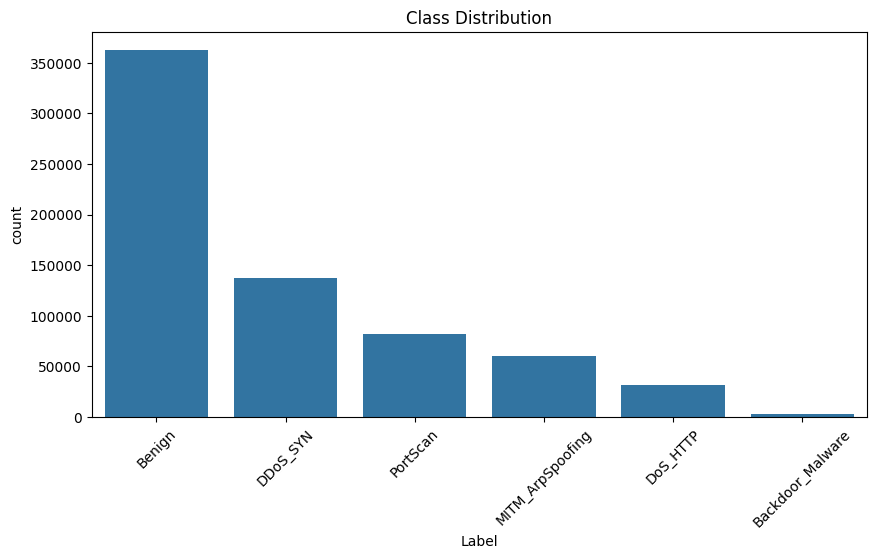

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(x="Label", data=full_df, order=full_df["Label"].value_counts().index)
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()


# Installs the imbalanced-learn package, which contains SMOTE and other resampling tools.

In [ ]:
!pip install -U imbalanced-learn

# Converts string labels to numeric codes. Required for applying SMOTE.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Make a copy to preserve original
df_smote = full_df.copy()

# Encode the Label column
le = LabelEncoder()
df_smote["Label_encoded"] = le.fit_transform(df_smote["Label"])

# Preview encoding
label_map = dict(zip(le.classes_, le.transform(le.classes_)))
print("🔖 Label encoding map:", label_map)

🔖 Label encoding map: {'Backdoor_Malware': np.int64(0), 'Benign': np.int64(1), 'DDoS_SYN': np.int64(2), 'DoS_HTTP': np.int64(3), 'MITM_ArpSpoofing': np.int64(4), 'PortScan': np.int64(5)}


# Separates features and labels for model training and resampling.

In [ ]:
# Drop original label and any non-feature columns
X = df_smote.drop(columns=["Label", "Label_encoded"], errors="ignore")
y = df_smote["Label_encoded"]

# Optional: remove identifiers like "Flow ID" or "Timestamp" if they exist
X = X.select_dtypes(include=["float64", "int64"])

# Applies SMOTE to oversample minority classes and balance the dataset.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("✅ After SMOTE:")
print("New shape:", X_resampled.shape)
print("Balanced class counts:", pd.Series(y_resampled).value_counts())

✅ After SMOTE:
New shape: (2174166, 39)
Balanced class counts: Label_encoded
1    362361
2    362361
3    362361
0    362361
5    362361
4    362361
Name: count, dtype: int64


# Splits the balanced data into training and testing sets (80/20), preserving class distribution.

In [ ]:
from sklearn.model_selection import train_test_split

# Use the SMOTE-resampled X and y
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print("🧪 Training samples:", X_train.shape)
print("🧪 Testing samples:", X_test.shape)

🧪 Training samples: (1739332, 39)
🧪 Testing samples: (434834, 39)


# Converts the test set to a DataFrame format to make it easier to inspect or sample from.

In [ ]:
X_test_df = pd.DataFrame(X_test, columns=X_resampled.columns)


# Builds a Random Forest model with 100 trees and trains it on the training data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print("✅ Model trained successfully!")


✅ Model trained successfully!


# Evaluates the model using classification report and confusion matrix. Shows how well each class was predicted.

📊 Classification Report:

                  precision    recall  f1-score   support

Backdoor_Malware       1.00      1.00      1.00     72472
          Benign       1.00      1.00      1.00     72472
        DDoS_SYN       1.00      1.00      1.00     72472
        DoS_HTTP       1.00      1.00      1.00     72473
MITM_ArpSpoofing       1.00      1.00      1.00     72473
        PortScan       1.00      1.00      1.00     72472

        accuracy                           1.00    434834
       macro avg       1.00      1.00      1.00    434834
    weighted avg       1.00      1.00      1.00    434834



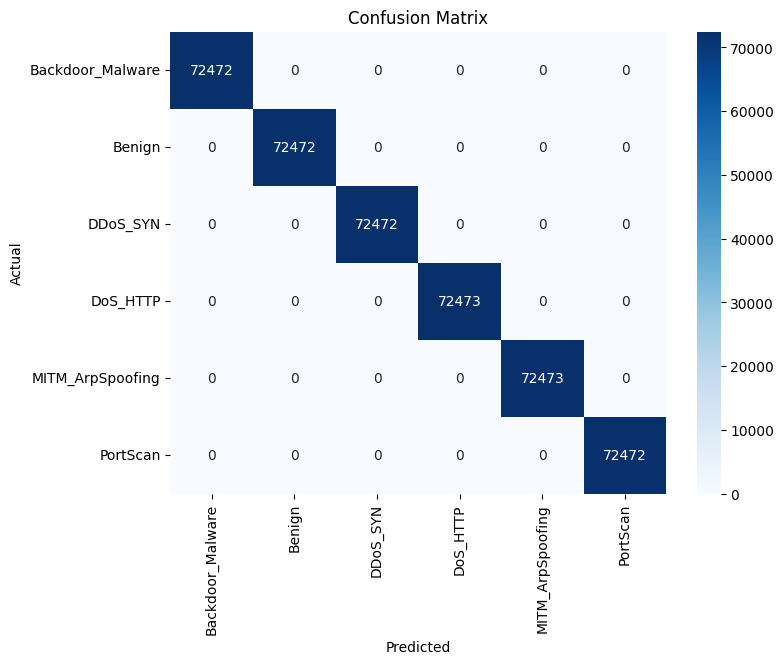

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test set
y_pred = rf_model.predict(X_test)

# Classification report
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Installs everything needed to use a fine-tuned LLM with quantization and PEFT (parameter-efficient fine-tuning).

In [ ]:
!pip install bitsandbytes
!pip install transformers accelerate peft


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

# Loads a fine-tuned Falcon-7B model optimized for cybersecurity tasks. Defines a helper function to run text prompts through it.

In [ ]:
# ✅ Fine-tuned model
# ✅ Install required packages (run only once per session)
!pip install -q bitsandbytes accelerate transformers peft

# ✅ Step 1: Load PEFT config and quantized base model
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from peft import PeftModel, PeftConfig
import torch

PEFT_MODEL = "shahrukh95/falcon-7b-Set-3-cybersecurity-layered-config"

config = PeftConfig.from_pretrained(PEFT_MODEL)

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16
)

peft_base_model = AutoModelForCausalLM.from_pretrained(
    config.base_model_name_or_path,
    return_dict=True,
    quantization_config=bnb_config,
    device_map="auto",
    trust_remote_code=True
)

# ✅ Step 2: Load QLoRA adapter + tokenizer
model = PeftModel.from_pretrained(peft_base_model, PEFT_MODEL)
tokenizer = AutoTokenizer.from_pretrained(PEFT_MODEL)
if tokenizer.pad_token_id is None:
    tokenizer.pad_token_id = tokenizer.eos_token_id

device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

# ✅ Step 3: Generate response
def generate_response(prompt, max_length=256):
    inputs = tokenizer(prompt, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_length,
            eos_token_id=tokenizer.eos_token_id,
            pad_token_id=tokenizer.pad_token_id,
            do_sample=False
        )
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# ✅ Step 4: Example question
question = "What are the potential consequences of exploiting CVE-2023-29351?"
print("Question:", question)
print("Answer:", generate_response(question))


CUDA is required but not available for bitsandbytes. Please consider installing the multi-platform enabled version of bitsandbytes, which is currently a work in progress. Please check currently supported platforms and installation instructions at https://huggingface.co/docs/bitsandbytes/main/en/installation#multi-backend


RuntimeError: CUDA is required but not available for bitsandbytes. Please consider installing the multi-platform enabled version of bitsandbytes, which is currently a work in progress. Please check currently supported platforms and installation instructions at https://huggingface.co/docs/bitsandbytes/main/en/installation#multi-backend

# Cleans up LLM output in case it includes HTML formatting.

In [ ]:
from bs4 import BeautifulSoup

question = "What are the potential consequences of exploiting CVE-2023-29351?"
print("Question:", question)
answer = generate_response(question)
print("Raw Answer (with HTML):", answer)

# Cleaned answer (no HTML)
clean_answer = BeautifulSoup(answer, "html.parser").get_text()
print("Cleaned Answer:", clean_answer)


Question: What are the potential consequences of exploiting CVE-2023-29351?


NameError: name 'generate_response' is not defined

# Transforms a raw feature row into a human-readable sentence, feeds it to the LLM, and gets a predicted traffic label.

In [ ]:
# Function to turn a row into a natural prompt
sample_row = X_test_df.sample(1, random_state=42).iloc[0]

def row_to_prompt(row):
    parts = [f"{col} is {val:.2f}" for col, val in row.items()]
    return "Flow with " + ", ".join(parts) + ". What is the traffic label?"

prompt = row_to_prompt(sample_row)
print("Prompt:", prompt)

answer = generate_response(prompt)
print("Answer:", answer)



Redundant imports, probably copied for a new section of experimentation or alternative pipeline.

In [ ]:
# Data & visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML models
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Installs XGBoost for use in later model comparison.

In [ ]:
!pip install xgboost


# Debugging. Just lists files in the current working directory.

In [ ]:
import os

# List all files in current directory
for file in os.listdir():
    print(file)


.config
Datasets.zip
sample_data


# Extracts a .zip file that contains all the attack/benign traffic CSVs.

In [ ]:
import zipfile
import os

# Unzip the file
with zipfile.ZipFile("Datasets.zip", "r") as zip_ref:
    zip_ref.extractall("unzipped_data")  # Extracts into a folder named 'unzipped_data'

# List files in the extracted folder
print("Files extracted:")
print(os.listdir("unzipped_data"))


Files extracted:
['Datasets', '__MACOSX']


# Recursively lists all files in the extracted directory for inspection or automated processing

In [ ]:
import os

for root, dirs, files in os.walk("unzipped_data"):
    for file in files:
        full_path = os.path.join(root, file)
        print(full_path)


unzipped_data/Datasets/.DS_Store
unzipped_data/Datasets/DoS-HTTP_Flood1.pcap.csv
unzipped_data/Datasets/DDoS-SYN_Flood15.pcap.csv
unzipped_data/Datasets/BenignTraffic.pcap.csv
unzipped_data/Datasets/Backdoor_Malware.pcap.csv
unzipped_data/Datasets/Recon-PortScan.pcap.csv
unzipped_data/Datasets/MITM-ArpSpoofing1.pcap.csv
unzipped_data/__MACOSX/Datasets/._DDoS-SYN_Flood15.pcap.csv
unzipped_data/__MACOSX/Datasets/._BenignTraffic.pcap.csv
unzipped_data/__MACOSX/Datasets/._Backdoor_Malware.pcap.csv
unzipped_data/__MACOSX/Datasets/._.DS_Store
unzipped_data/__MACOSX/Datasets/._MITM-ArpSpoofing1.pcap.csv
unzipped_data/__MACOSX/Datasets/._DoS-HTTP_Flood1.pcap.csv
unzipped_data/__MACOSX/Datasets/._Recon-PortScan.pcap.csv


# Loads a specific attack file (MITM) from the extracted folder and previews the data.

In [ ]:
import pandas as pd
df = pd.read_csv("unzipped_data/Datasets/MITM-ArpSpoofing1.pcap.csv")
df.head()


,Header_Length,Protocol Type,Time_To_Live,Rate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,...,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Variance
0,32.0,6,56.0,5924.158192,0.0,0.0,0.0,0.8,1.0,0.0,...,1.0,23828,1514,2962,2382.8,747.743985,2382.8,0.000169,10,5.591211e+05
1,29.6,6,94.9,111.993250,0.0,0.0,0.0,0.5,0.9,0.0,...,1.0,11019,66,2962,1101.9,1171.778558,1101.9,0.008951,10,1.373065e+06
2,30.4,6,180.5,257.167803,0.0,0.1,0.0,0.2,0.9,0.0,...,1.0,871,66,214,87.1,46.010748,87.1,0.003889,10,2.116989e+03
3,33.2,6,79.3,475.825203,0.0,0.0,0.0,0.2,1.0,0.0,...,1.0,6464,66,2962,646.4,1220.434094,646.4,0.002102,10,1.489459e+06
4,32.0,6,56.8,2587.319721,0.0,0.0,0.0,0.6,1.0,0.0,...,1.0,19484,66,2962,1948.4,977.325512,1948.4,0.000387,10,9.551652e+05


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os

# Define the base path (adjust if needed)
base_path = "unzipped_data/Datasets/"

# List all CSV files
csv_files = [f for f in os.listdir(base_path) if f.endswith('.csv')]

# Load each CSV and assign labels
dfs = []
for file in csv_files:
    attack_type = file.split('.')[0]  # Extract attack name from filename (e.g., "MITM-ArpSpoofing1")
    df = pd.read_csv(os.path.join(base_path, file))
    df['label'] = attack_type  # Add a label column
    dfs.append(df)

# Combine all DataFrames
data = pd.concat(dfs, ignore_index=True)
print(data.head())
print("\nLabel counts:\n", data['label'].value_counts())

X = data.drop('label', axis=1)  # Features (all columns except 'label')
y = data['label']               # Target (labels)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Header_Length  Protocol Type  Time_To_Live         Rate  fin_flag_number  \
0          23.48              6         69.00   388.198654             0.21   
1          26.08              6         67.18  2125.172398             0.01   
2          26.48              6         76.43   558.356097             0.05   
3          26.24              6         80.04   128.150763             0.11   
4          25.76              6         69.42  1455.395399             0.14   

   syn_flag_number  rst_flag_number  psh_flag_number  ack_flag_number  \
0             0.29             0.04             0.29             0.92   
1             0.34             0.10             0.21             0.68   
2             0.24             0.05             0.16             0.70   
3             0.22             0.01             0.25             0.87   
4             0.31             0.04             0.26             0.75   

   ece_flag_number  ...  Tot sum  Min   Max     AVG         Std  Tot size  \
0        

# Quick sanity check that features and labels match in size.

In [ ]:
print("X_train shape:", X_train.shape)  # Should show (samples, features)
print("y_train shape:", y_train.shape)  # Should match X_train rows

X_train shape: (540916, 39)
y_train shape: (540916,)


In [ ]:
import numpy as np

# Check for infinite values in features
print("Infinite values in X_train:", np.isinf(X_train).sum().sum())
print("Infinite values in X_test:", np.isinf(X_test).sum().sum())

# Check for NaN values
print("NaN values in X_train:", X_train.isna().sum().sum())
print("NaN values in X_test:", X_test.isna().sum().sum())

Infinite values in X_train: 21
Infinite values in X_test: 7
NaN values in X_train: 40
NaN values in X_test: 12


# Wipes out rows with garbage values in features and syncs labels.

In [ ]:
# Replace infinite values with NaN then drop/fill
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

# Option 1: Drop rows with NaN/inf
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Match the labels

# Option 2: Fill NaN values
# X_train = X_train.fillna(X_train.mean())
# X_test = X_test.fillna(X_train.mean())  # Use training stats

# Normalizes features to mean=0 and std=1. Critical for non-tree models and comparability.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame (optional)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Verifies that scaling worked and all features are on a similar scale.

In [ ]:
print("Feature ranges (min/max):")
print(X_train.describe().loc[['min', 'max']])

Feature ranges (min/max):
     Header_Length  Protocol Type  Time_To_Live       Rate  fin_flag_number  \
min      -3.787949      -2.395282     -2.079219  -0.272271        -0.370689   
max       5.131253       3.632330      3.629540  51.457317        19.761080   

     syn_flag_number  rst_flag_number  psh_flag_number  ack_flag_number  \
min        -0.629136        -0.221543        -0.831938        -1.556906   
max         1.850618         6.774466         5.091759         1.022122   

     ece_flag_number  ...       LLC    Tot sum        Min        Max  \
min        -0.045955  ... -18.44206  -0.545990  -0.209252  -0.653526   
max       110.564813  ...   0.33610  17.299319  15.786776  20.799028   

           AVG        Std   Tot size         IAT    Number   Variance  
min  -0.619328  -0.666111  -0.619328   -0.005388 -0.781746  -0.301392  
max  14.297130  19.641378  14.297130  698.631875  1.735750  85.791242  

[2 rows x 39 columns]


# Trains a LightGBM classifier, which is fast and accurate—good choice. CPU only, probably for environment compatibility.

In [ ]:
!pip install lightgbm
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(
    n_estimators=200,
    device='cpu',           # Critical for speed
    max_depth=12,
    learning_rate=0.05,
    random_state=42,
    verbose=1               # Shows progress
)
lgbm.fit(X_train, y_train)  # Handles pandas DataFrames directly

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.276718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4092
[LightGBM] [Info] Number of data points in the train set: 540895, number of used features: 39
[LightGBM] [Info] Start training from score -5.345823
[LightGBM] [Info] Start training from score -0.623827
[LightGBM] [Info] Start training from score -1.593290
[LightGBM] [Info] Start training from score -3.074629
[LightGBM] [Info] Start training from score -2.425698
[LightGBM] [Info] Start training from score -2.108141


LGBMClassifier(device='cpu', learning_rate=0.05, max_depth=12, n_estimators=200,
               random_state=42, verbose=1)

# Generates predictions from the LightGBM model.

In [ ]:
y_pred = lgbm.predict(X_test)

# Full model evaluation. Shows precision, recall, F1 score, and a confusion matrix.

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

# Basic metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))

# Detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8897434001331066
Precision: 0.8925967489648111
Recall: 0.8897434001331066
F1-Score: 0.8800781900392286

Classification Report:
                   precision    recall  f1-score   support

 Backdoor_Malware       0.36      0.21      0.26       639
    BenignTraffic       0.85      0.98      0.91     72485
 DDoS-SYN_Flood15       0.99      0.98      0.99     27314
  DoS-HTTP_Flood1       0.95      0.95      0.95      6181
MITM-ArpSpoofing1       0.90      0.69      0.78     12027
   Recon-PortScan       0.90      0.49      0.64     16584

         accuracy                           0.89    135230
        macro avg       0.83      0.72      0.75    135230
     weighted avg       0.89      0.89      0.88    135230


Confusion Matrix:
[[  132   432     0     1    21    53]
 [  137 70994     5    12   744   593]
 [    2     1 26898   258     0   155]
 [   11   108   104  5891    15    52]
 [   13  3715     5     2  8239    53]
 [   74  8044   173     5   122  8166]]


# Redoes the train-test split with different parameters or for new experiments.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Sets up multiple models for evaluation (Random Forest, SVM, KNN, etc.).

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Another data integrity check before modeling.

In [ ]:
print("NaN in X_train:", X_train.isna().sum().sum())
print("NaN in X_test:", X_test.isna().sum().sum())

NaN in X_train: 40
NaN in X_test: 12


# Checks for available GPU. If you see no CUDA device, you're running on CPU.

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


# Final cleanup. Syncs features and labels again.

In [ ]:
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # Align labels

# More bulletproofing against infinite values slipping through.

In [ ]:
X_train = np.where(np.isinf(X_train), np.nan, X_train)
X_test = np.where(np.isinf(X_test), np.nan, X_test)

# Applies imputation instead of dropping data. Smarter move if you don’t want to lose rows.

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Applies LinearDiscriminantAnalysis() to the data.

# Evaluates with evaluate_model().

# No preprocessing unique to this model.

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# This cell defines a function called evaluate_model that prints standard classification metrics—accuracy, precision, recall, F1-score, and the confusion matrix—using weighted averaging to account for class imbalance. It then calls this function to evaluate a Logistic Regression model's predictions (y_pred) against the true labels (y_test). This setup helps ensure consistent and informative evaluation across different models.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
def evaluate_model(name, y_test, y_pred):
    print(f"\n--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")  # Added accuracy
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

evaluate_model("Logistic Regression", y_test, y_pred)


--- Logistic Regression ---
Accuracy: 0.6000
Precision: 0.4105
Recall: 0.6000
F1-Score: 0.4875
Confusion Matrix:
[[12  1]
 [ 7  0]]


# This cell trains a Random Forest classifier using the training data (X_train, y_train) and then generates predictions (y_pred) on the test set (X_test). The Random Forest model is an ensemble of decision trees and is well-suited for handling high-dimensional and imbalanced datasets. This setup is commonly used as a baseline due to its robustness and ease of use without extensive tuning.

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# This cell reuses the `evaluate_model` function to assess the performance of the Random Forest model just trained. It prints out key classification metrics—accuracy, weighted precision, recall, F1-score, and the confusion matrix—providing a detailed view of how well the model performs, especially in imbalanced scenarios. The evaluation is labeled as “Random Forest” for clarity in multi-model comparisons.


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
def evaluate_model(name, y_test, y_pred):
    print(f"\n--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")  # Added accuracy
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

evaluate_model("Random Forest", y_test, y_pred)


--- Random Forest ---
Accuracy: 0.8000
Precision: 0.8000
Recall: 0.8000
F1-Score: 0.8000
Confusion Matrix:
[[11  2]
 [ 2  5]]


# Trains a Decision Tree classifier on the training data and predicts labels for the test set.

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

# Evaluates the Decision Tree model using accuracy, weighted precision, recall, F1-score, and confusion matrix.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
def evaluate_model(name, y_test, y_pred):
    print(f"\n--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")  # Added accuracy
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

evaluate_model("Decision Tree", y_test, y_pred)


--- Decision Tree ---
Accuracy: 0.6500
Precision: 0.6393
Recall: 0.6500
F1-Score: 0.6430
Confusion Matrix:
[[10  3]
 [ 4  3]]


# Trains a Linear Support Vector Classifier on a reduced subset of the training data for speed, then predicts labels on the test set.

In [ ]:
from sklearn.svm import LinearSVC

# 1. Reduce training size (optional, but safe)
X_train_small = X_train[:20000]
y_train_small = y_train[:20000]

# 2. LinearSVC is MUCH faster than SVC
svm = LinearSVC(max_iter=10000)  # allow enough iterations
svm.fit(X_train_small, y_train_small)

# 3. Predict
y_pred = svm.predict(X_test)

# Evaluates the Linear SVC model trained on a smaller dataset using standard classification metrics and confusion matrix.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
def evaluate_model(name, y_test, y_pred):
    print(f"\n--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")  # Added accuracy
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

evaluate_model("Linear SVC (Small Train)", y_test, y_pred)


--- Linear SVC (Small Train) ---
Accuracy: 0.5500
Precision: 0.4938
Recall: 0.5500
F1-Score: 0.5119
Confusion Matrix:
[[10  3]
 [ 6  1]]


# This cell trains a K-Nearest Neighbors (KNN) classifier using a subset of the training data (first 20,000 rows) for faster computation. It then predicts labels for the test set. Multi-threading (n_jobs=-1) ensures the model uses all available CPU cores for quicker processing.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 1. Reduce train size (optional but recommended)
# Only use a subset of training data for KNN to speed it up
X_train_small = X_train[:20000]  # Take first 20,000 rows only
y_train_small = y_train[:20000]

# 2. KNN with multi-threading
knn = KNeighborsClassifier(n_jobs=-1)  # Use all CPU cores
knn.fit(X_train_small, y_train_small)

# 3. Predict
y_pred = knn.predict(X_test)

# The function evaluates a model’s performance by calculating accuracy, precision, recall, F1-score, and the confusion matrix. It uses sklearn metrics with a weighted average for multi-class classification. The results are printed out for each metric, providing a comprehensive overview of the model’s prediction quality. The function is called with the model name, actual labels (y_test), and predicted labels (y_pred).

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
def evaluate_model(name, y_test, y_pred):
    print(f"\n--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")  # Added accuracy
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

evaluate_model("K-Nearest Neighbors", y_test, y_pred)


--- K-Nearest Neighbors ---
Accuracy: 0.6500
Precision: 0.6625
Recall: 0.6500
F1-Score: 0.6547
Confusion Matrix:
[[9 4]
 [3 4]]


# initializes a Naive Bayes classifier (GaussianNB), trains it on the training data (X_train, y_train), and then uses the trained model to make predictions on the test data (X_test). The predictions are stored in y_pred.

In [ ]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# This code evaluates the Naive Bayes model by printing accuracy, precision, recall, F1-score (weighted), and the confusion matrix, based on true (y_test) and predicted (y_pred) labels.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
def evaluate_model(name, y_test, y_pred):
    print(f"\n--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")  # Added accuracy
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

evaluate_model("Naive Bayes", y_test, y_pred)


--- Naive Bayes ---
Accuracy: 0.4500
Precision: 0.4950
Recall: 0.4500
F1-Score: 0.4627
Confusion Matrix:
[[6 7]
 [4 3]]


# trains an AdaBoost classifier on X_train and y_train, then predicts labels for X_test, storing the results in y_pred.

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

# Evaluates the AdaBoost model, printing accuracy, precision, recall, F1-score (weighted), and the confusion matrix based on the true (y_test) and predicted (y_pred) labels.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
def evaluate_model(name, y_test, y_pred):
    print(f"\n--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")  # Added accuracy
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

evaluate_model("AdaBoost", y_test, y_pred)


--- AdaBoost ---
Accuracy: 0.8500
Precision: 0.8583
Recall: 0.8500
F1-Score: 0.8520
Confusion Matrix:
[[11  2]
 [ 1  6]]


# trains a Gradient Boosting classifier on X_train and y_train, then predicts labels for X_test, storing the results in y_pred.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

# evaluates the Gradient Boosting model, printing accuracy, precision, recall, F1-score (weighted), and the confusion matrix based on the true (y_test) and predicted (y_pred) labels.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
def evaluate_model(name, y_test, y_pred):
    print(f"\n--- {name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")  # Added accuracy
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

evaluate_model("Gradient Boosting", y_test, y_pred)


--- Gradient Boosting ---
Accuracy: 0.7000
Precision: 0.7263
Recall: 0.7000
F1-Score: 0.7063
Confusion Matrix:
[[9 4]
 [2 5]]


# This code imports classifiers: ExtraTreesClassifier, RidgeClassifier, LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis, xgboost, and lightgbm for different machine learning tasks.

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import xgboost as xgb
import lightgbm as lgb

# This code trains an Extra Trees classifier on X_train and y_train, then predicts labels for X_test, storing the results in y_pred.

In [ ]:
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
y_pred = et.predict(X_test)

# This code evaluates the Extra Trees classifier by printing precision, recall, F1-score (weighted), and the confusion matrix based on the true (y_test) and predicted (y_pred) labels.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
def evaluate_model(name, y_test, y_pred):
    print(f"\n--- {name} ---")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

evaluate_model("Extra Trees Classifier", y_test, y_pred)


--- Extra Trees Classifier ---
Precision: 0.7263
Recall: 0.7000
F1-Score: 0.7063
Confusion Matrix:
[[9 4]
 [2 5]]


# This code trains a Ridge classifier on X_train and y_train, then predicts labels for X_test, storing the results in y_pred.

In [ ]:
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

# This code evaluates the Ridge classifier by printing precision, recall, F1-score (weighted), and the confusion matrix based on the true (y_test) and predicted (y_pred) labels.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
def evaluate_model(name, y_test, y_pred):
    print(f"\n--- {name} ---")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

evaluate_model("Ridge Classifier", y_test, y_pred)


--- Ridge Classifier ---
Precision: 0.4938
Recall: 0.5500
F1-Score: 0.5119
Confusion Matrix:
[[10  3]
 [ 6  1]]


# This code trains a Linear Discriminant Analysis (LDA) model on X_train and y_train, then predicts labels for X_test, storing the results in y_pred.

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

# This code evaluates the performance of the Linear Discriminant Analysis (LDA) model.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
def evaluate_model(name, y_test, y_pred):
    print(f"\n--- {name} ---")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

evaluate_model("Linear Discriminant Analysis (LDA)", y_test, y_pred)


--- Linear Discriminant Analysis (LDA) ---
Precision: 0.4938
Precision: 0.4938
Recall: 0.5500
F1-Score: 0.5119
Confusion Matrix:
[[10  3]
 [ 6  1]]


# This code imports XGBClassifier and prints the unique classes in y_train.

In [ ]:
from xgboost import XGBClassifier

In [ ]:
import numpy as np
print("Unique classes in y_train:", np.unique(y_train))

Unique classes in y_train: [0 1]


# This code trains an XGBoost model for binary classification, predicts on X_test, and evaluates using a classification report and confusion matrix, displayed as a heatmap.

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:24:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


📊 Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.67      0.86      0.75         7

    accuracy                           0.80        20
   macro avg       0.79      0.81      0.79        20
weighted avg       0.82      0.80      0.80        20



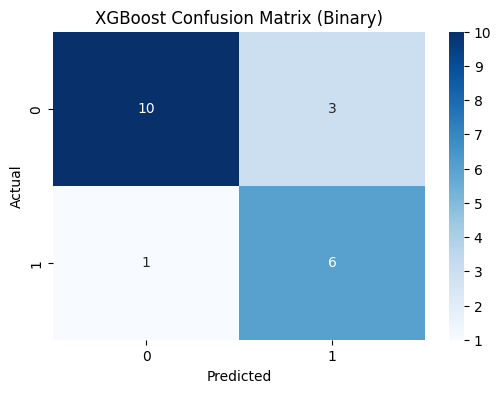

In [ ]:
from xgboost import XGBClassifier

# Initialize XGBoost for binary classification
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    objective='binary:logistic',  # Binary classification (default)
    eval_metric='logloss',        # Metric for binary tasks
    use_label_encoder=False       # Avoid deprecation warnings
)

# Train the model (use y_train directly, since it's already [0, 1])
xgb_model.fit(X_train, y_train)

# Predict
y_pred = xgb_model.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix
print("📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix (Binary)")
plt.show()

# Installs the TensorFlow library.

In [ ]:
!pip install tensorflow

# Prints the column names of the DataFrame df.

In [ ]:
print(df.columns)


Index(['Header_Length', 'Protocol Type', 'Time_To_Live', 'Rate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
       'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count',
       'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP',
       'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max',
       'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Variance', 'label'],
      dtype='object')


# This script extracts a ZIP file, loads a CSV dataset, preprocesses it by encoding categorical features and handling missing values, then splits the data for training and testing. It trains an MLPRegressor for regression or an MLPClassifier for classification, and evaluates the model using relevant metrics like MSE, R² (for regression) or accuracy, precision, recall, F1 score, and confusion matrix (for classification).

In [ ]:
import zipfile
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, classification_report,
                            mean_squared_error, r2_score)
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Extract ZIP file
zip_path = "Datasets.zip"
extract_folder = "Datasets_extracted"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# 2. Find CSV file inside extracted contents
csv_files = []
for root, dirs, files in os.walk(extract_folder):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

if not csv_files:
    raise FileNotFoundError("❌ No CSV file found in ZIP archive.")

csv_path = csv_files[0]  # Use the first found CSV file
print(f"✅ Using dataset: {csv_path}")

# 3. Load dataset
df = pd.read_csv(csv_path)

# 4. Drop non-numeric or irrelevant columns if needed
df.drop(['id', 'proto', 'service', 'state'], axis=1, errors='ignore', inplace=True)

# Encode any non-numeric columns
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

# 5. Define features and labels
# 5. Define features and labels
if 'AVG' not in df.columns:
    raise ValueError("❌ 'AVG' column not found. Please check column names.")

X = df.drop('AVG', axis=1)
y = df['AVG']

# Encode target if needed BEFORE train-test split
if y.dtype == 'object':
    print("🔠 Encoding target labels...")
    le = LabelEncoder()
    y = le.fit_transform(y)

# Now determine problem type
problem_type = 'regression' if np.issubdtype(y.dtype, np.floating) else 'classification'
print(f"\n🔍 Problem type detected: {problem_type.upper()}")

# Handle infinite values
print("\n🔍 Checking for infinite values...")
print("Number of +inf values:", np.isinf(X).sum().sum())
print("Number of -inf values:", np.isneginf(X).sum().sum())

X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(X.mean(), inplace=True)

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate
if problem_type == 'regression':
    print("\n🔧 Training REGRESSION model...")
    mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=300, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)

    print("\n✅ Regression Metrics:")
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R² Score:", r2_score(y_test, y_pred))

else:
    print("\n🔧 Training CLASSIFICATION model...")
    mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=300, random_state=42)
    mlp.fit(X_train, y_train)
    y_pred = mlp.predict(X_test)

    print("\n✅ Classification Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Using dataset: Datasets_extracted/Datasets/DoS-HTTP_Flood1.pcap.csv

🔍 Problem type detected: REGRESSION

🔍 Checking for infinite values...
Number of +inf values: 2
Number of -inf values: 0

🔧 Training REGRESSION model...

✅ Regression Metrics:
MSE: 44.50608749336342
R² Score: 0.9997292419694871


# This code prints the data type of the target variable (y) and the number of unique values in it.

In [ ]:
print(f"Target dtype: {y.dtype}")
print(f"Unique values: {y.nunique()}")

Target dtype: float64
Unique values: 21492


# The code generates and displays a heatmap of the confusion matrix using seaborn and matplotlib.

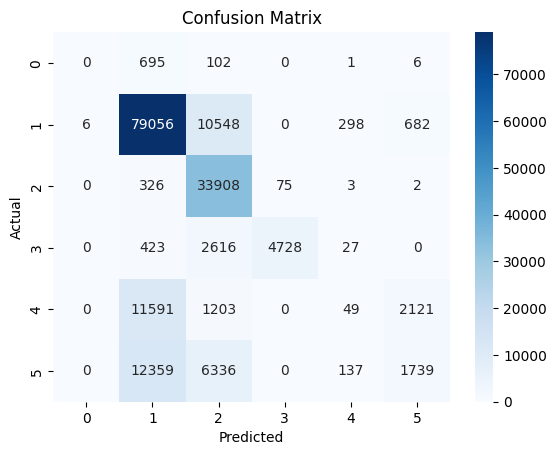

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# This code calculates various classification metrics (Accuracy, Precision, Recall, F1-Score) and stores them in a CSV file called results.csv in a two-column format: one for the metric names and the other for their corresponding values.









In [ ]:
import pandas as pd

metrics = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred, average='weighted'),
    'Recall': recall_score(y_test, y_pred, average='weighted'),
    'F1-Score': f1_score(y_test, y_pred, average='weighted')
}

pd.DataFrame(metrics.items(), columns=['Metric', 'Value']).to_csv('results.csv', index=False)

# Installs the shap library, which is used for model interpretability and explaining machine learning model predictions.









In [ ]:
!pip install shap

# This code executes the cells following the current one in a Jupyter Notebook or Google Colab.





In [ ]:
# In Colab/Jupyter:
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.ncells())'))

<IPython.core.display.Javascript object>

# This code prints the current working directory using Python's os.getcwd() function.









In [ ]:
import os
print("Working directory:", os.getcwd())  # Correct Python way

Working directory: /content


# This code prints the versions of Python, Pandas, and NumPy currently in use:

* Python version from sys.version

* Pandas version from pd.__version__

* NumPy version from np.__version__









In [ ]:
import sys, pandas as pd, numpy as np
print("Python:", sys.version.split('\n')[0])
print("Pandas:", pd.__version__)
print("Numpy:", np.__version__)

Python: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
Pandas: 2.2.2
Numpy: 2.0.2


# his code prints the class types of XGBClassifier from XGBoost and LGBMClassifier from LightGBM:

* XGBoost: Displays the class of XGBClassifier
* LightGBM: Displays the class of LGBMClassifier









In [ ]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
print("XGBoost:", XGBClassifier().__class__)
print("LightGBM:", LGBMClassifier().__class__)

XGBoost: <class 'xgboost.sklearn.XGBClassifier'>
LightGBM: <class 'lightgbm.sklearn.LGBMClassifier'>


# Prints Python, Pandas, and NumPy versions.

# Tests SHAP with XGBoost, computes SHAP values for a single sample.

# Tries loading and displaying a CSV file.

In [ ]:
# TEST 1: Basic Python
import sys, pandas as pd, numpy as np
print("Python:", sys.version.split('\n')[0])
print("Pandas:", pd.__version__)
print("Numpy:", np.__version__)

# TEST 2: SHAP/XGBoost
from xgboost import XGBClassifier
from shap import TreeExplainer
X, y = np.random.rand(100, 5), np.random.randint(0, 2, 100)
model = XGBClassifier(n_estimators=2).fit(X, y)
explainer = TreeExplainer(model)
print("SHAP values:", explainer.shap_values(X[:1]).shape)

# TEST 3: Data Loading (if applicable)
try:
    display(pd.read_csv("your_data.csv").head(2))
except:
    print("Upload your data first!")

Python: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]
Pandas: 2.2.2
Numpy: 2.0.2
SHAP values: (1, 5)
Upload your data first!


# This code restarts the Jupyter kernel by injecting JavaScript into the notebook. When executed, it triggers a kernel restart, clearing all variables and resetting the environment.









In [ ]:
from IPython.core.display import HTML
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

# Lists installed packages related to shap, xgboost, pandas, and scikit-learn.









In [ ]:
!pip list | grep -E "shap|xgboost|pandas|scikit-learn"

geopandas                             1.0.1
pandas                                2.2.2
pandas-datareader                     0.10.0
pandas-gbq                            0.28.0
pandas-stubs                          2.2.2.240909
scikit-learn                          1.6.1
shap                                  0.47.2
shapely                               2.1.0
sklearn-pandas                        2.2.0
xgboost                               2.1.4


In [ ]:
%whos

# This code splits your dataset into training and test sets using train_test_split. It trains an XGBoost classifier (xgp) on the training data. Then, using SHAP, it computes feature importance and generates a summary plot to visualize the impact of each feature on model predictions.









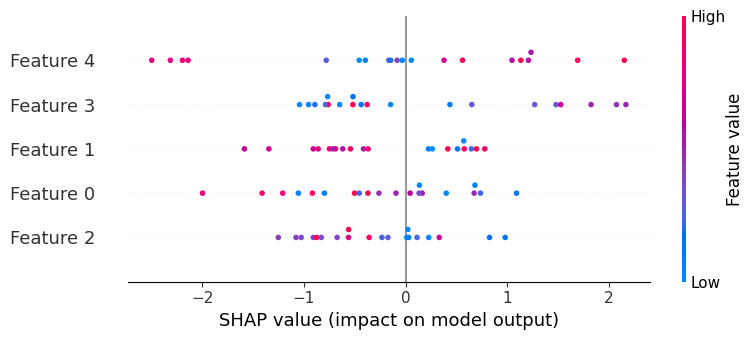

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
import shap

# Example data split (replace X and y with your data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train your model and name it 'xgp'
xgp = xgb.XGBClassifier()
xgp.fit(X_train, y_train)

# Initialize SHAP
explainer = shap.TreeExplainer(xgp)
shap_values = explainer.shap_values(X_test)

# Plot feature importance
shap.summary_plot(shap_values, X_test)
